In [241]:
import numpy as np
import pandas as pd

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score

In [243]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

In [244]:
# Load the Iris dataset
data = pd.read_csv("/content/iris.csv")

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [246]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [247]:
data.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [248]:
# Preprocessing the dataset
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [249]:
# Encode the categorical target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = np_utils.to_categorical(y)

In [250]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [251]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [252]:
# Function to create the model
def create_model(activation):
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation=activation))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [253]:
# List of activation functions to evaluate
activation_functions = ['sigmoid', 'tanh', 'relu']

best_accuracy = 0
best_activation = ''
best_model = None


In [254]:
# Iterate through activation functions and evaluate the model
for activation in activation_functions:
    model = KerasClassifier(build_fn=create_model, activation=activation, epochs=100, batch_size=5, verbose=0)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test))

<ipython-input-254-b9e4954de154>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, activation=activation, epochs=100, batch_size=5, verbose=0)


In [255]:
# Iterate through activation functions and evaluate the model
for activation in activation_functions:
    model = KerasClassifier(build_fn=create_model, activation=activation, epochs=100, batch_size=5, verbose=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    loss = model.model.evaluate(X_test, y_test, verbose=0)[0]
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='macro')
    print(f'Loss with {activation} activation function: {loss}')
    print(f'Accuracy with {activation} activation function: {accuracy}')
    print(f'F1-Score with {activation} activation function: {f1}')


<ipython-input-255-9d7ca11e09e0>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, activation=activation, epochs=100, batch_size=5, verbose=0)


1/1 [==============================] - 0s 62ms/step
Loss with sigmoid activation function: 0.28340089321136475
Accuracy with sigmoid activation function: 0.9333333333333333
F1-Score with sigmoid activation function: 0.9305555555555555


<ipython-input-255-9d7ca11e09e0>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, activation=activation, epochs=100, batch_size=5, verbose=0)


1/1 [==============================] - 0s 56ms/step
Loss with tanh activation function: 0.08829502761363983
Accuracy with tanh activation function: 1.0
F1-Score with tanh activation function: 1.0


<ipython-input-255-9d7ca11e09e0>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, activation=activation, epochs=100, batch_size=5, verbose=0)


1/1 [==============================] - 0s 57ms/step
Loss with relu activation function: 0.1020612046122551
Accuracy with relu activation function: 1.0
F1-Score with relu activation function: 1.0


In [256]:
import matplotlib.pyplot as plt

In [257]:
# Training and testing loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']

In [258]:
# Training and testing accuracy
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

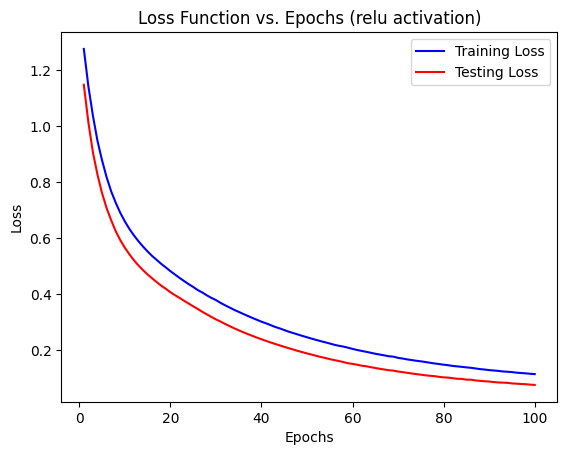

In [259]:
  # Plotting the loss function vs. epochs
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, test_loss, 'r-', label='Testing Loss')
plt.title(f'Loss Function vs. Epochs ({activation} activation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

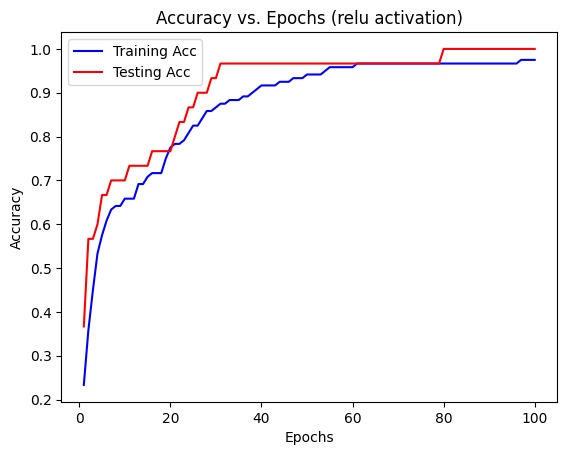

In [262]:
 # Plotting the accuracy function vs. epochs
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b-', label='Training Acc')
plt.plot(epochs, test_acc, 'r-', label='Testing Acc')
plt.title(f'Accuracy vs. Epochs ({activation} activation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [260]:
# Update the best activation function
if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_activation = activation
        best_model = model


print(f'\nBest activation function for Iris data: {best_activation} with accuracy {best_accuracy}')




Best activation function for Iris data: relu with accuracy 1.0
